Pytorch experiments

In [124]:
import json
import numpy as np
import os
import struct
from array import array as pyarray
import torch
import time
import matplotlib.pyplot as plt

In [65]:
data_folder = r"C:\Users\avido\Desktop\NU Coursework\CS 349 - Machine Learning\homeworks\hw7-gradient-descent-Flishworks\data"

train_features, test_features, train_targets, test_targets = \
    load_mnist_data(10, fraction=.5, examples_per_class=100,
                            mnist_folder=data_folder)

In [15]:
#custom dataloader
from torch.utils.data.dataset import Dataset

class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __getitem__(self, index):
        x = self.x[index]
        y = self.y[index]
        return (x, y)

    def __len__(self):
        return self.x.shape[0]

In [ ]:
training_set_sizes = [500, 1000, 1500, 2000]
epochs = 100
batch_size = 10

In [66]:
#torch.from_numpy(train_features)
x = torch.from_numpy(train_features).float()
y = torch.from_numpy(train_targets).float()
train_loader = torch.utils.data.DataLoader(MyDataset(x,y), batch_size=batch_size, shuffle=True)

In [67]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x)

In [137]:
network = Net()
optimizer = torch.optim.SGD(network.parameters(), lr=.01)
loser = nn.CrossEntropyLoss()
#criterion = nn.NLLLoss()

In [138]:
for epoch in range(epochs):
    for batch_idx, (features, targets) in enumerate(train_loader):
        features, targets = torch.autograd.Variable(x), torch.autograd.Variable(y)
        # resize data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        features = features.view(-1, 28*28)
        optimizer.zero_grad()
        net_out = network(features)
        loss = loser(net_out, targets.long())
        loss.backward()
        optimizer.step()


C:\Users\avido\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


In [139]:
#torch.from_numpy(train_features)
x = torch.from_numpy(test_features).float()
y = torch.from_numpy(test_targets).float()

test_loader = torch.utils.data.DataLoader(MyDataset(x,y), batch_size=batch_size, shuffle=True)

In [156]:
# run a test loop
loss = 0
correct = 0
for features, targets in test_loader:
    feaures, targets = torch.autograd.Variable(features, volatile=True), torch.autograd.Variable(targets)
    features = features.view(-1, 28 * 28)
    net_out = network(features)
    # get loss
    loss += loser(net_out, targets.long()).data.item()
    #get number correct
    pred = net_out.data.max(1)[1]  # get the index of the max log-probability
    correct += pred.eq(targets.data.long()).sum()

avg_loss = loss / len(test_loader.dataset)
accuracy = 100. * correct.item() / len(test_loader.dataset)
print(avg_loss)
print(accuracy)

0.001299263833090663
100.0


C:\Users\avido\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  """
C:\Users\avido\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


1559970375.917404

In [158]:
#putting it all together

training_set_sizes = [500, 1000, 1500, 2000]
epochs = 100
batch_size = 10
train_times = []
accuracies = []

for set_size in training_set_sizes:
    #torch.from_numpy(train_features)
    train_features, test_features, train_targets, test_targets = load_mnist_data(10, fraction=.5, examples_per_class=int(set_size/10), mnist_folder=data_folder)
    x = torch.from_numpy(train_features).float()
    y = torch.from_numpy(train_targets).float()
    train_loader = torch.utils.data.DataLoader(MyDataset(x,y), batch_size=batch_size, shuffle=True)
   
    #train
    timer=time.time()
    for epoch in range(epochs):
        for batch_idx, (features, targets) in enumerate(train_loader):
            features, targets = torch.autograd.Variable(x), torch.autograd.Variable(y)
            # resize data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
            features = features.view(-1, 28*28)
            optimizer.zero_grad()
            net_out = network(features)
            loss = loser(net_out, targets.long())
            loss.backward()
            optimizer.step()
        print(".")
    
    train_times.append(time.time()-timer)
    #torch.from_numpy(train_features)
    x = torch.from_numpy(test_features).float()
    y = torch.from_numpy(test_targets).float()

    test_loader = torch.utils.data.DataLoader(MyDataset(x,y), batch_size=batch_size, shuffle=True)
    # prediction loop   
    loss = 0
    correct = 0
    for features, targets in test_loader:
        feaures, targets = torch.autograd.Variable(features, volatile=True), torch.autograd.Variable(targets)
        features = features.view(-1, 28 * 28)
        net_out = network(features)
        # get loss
        loss += loser(net_out, targets.long()).data.item()
        #get number correct
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correct += pred.eq(targets.data.long()).sum()

    avg_loss = loss / len(test_loader.dataset)
    accuracy = 100. * correct.item() / len(test_loader.dataset)
    accuracies.append(accuracy)

    print("set complete")

C:\Users\avido\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
set complete

C:\Users\avido\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.



.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
set complete
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
set complete
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
set complete


In [160]:
accuracies_2 = []
for ac in accuracies:
    accuracies_2.append(ac)

train_times_2 = train_times

In [161]:
print(accuracies_1)
print(train_times_1)
print(accuracies_2)
print(train_times_2)

[89, 90, 97, 99]
[9.403792142868042, 22.962580680847168, 44.33360314369202, 80.75569343566895]
[97.6, 94.6, 91.73333333333333, 91.3]
[9.146553993225098, 23.076350450515747, 45.2956383228302, 83.47179198265076]


Text(0,0.5,'Training times (seconds)')

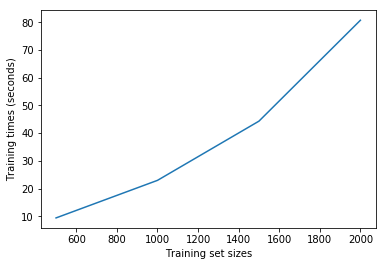

In [135]:
plt.plot(training_set_sizes, train_times_1)
plt.xlabel("Training set sizes")
plt.ylabel("Training times (seconds)")

[99, 97, 90, 89]


Text(0,0.5,'Accuracies')

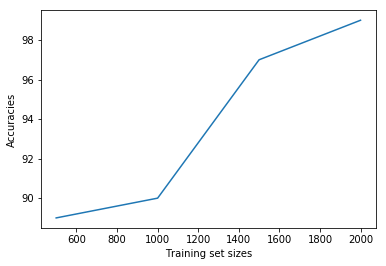

In [134]:
accuracies_3 = accuracies_1[::-1]
print(accuracies_3)
plt.plot(training_set_sizes, accuracies_3[::-1])
plt.xlabel("Training set sizes")
plt.ylabel("Accuracies")

Now for dogs

In [164]:
dog_loader = DogsDataset(r"C:\Users\avido\Desktop\NU Coursework\CS 349 - Machine Learning\homeworks\hw8-neural-networks-Flishworks\data\DogSet")

loading train...
loading valid...
loading test...


In [191]:
train_features, train_targets = dog_loader.get_train_examples()
print(train_features.shape)
#plt.imshow(train_features[0])
valid_features, valid_targets = dog_loader.get_validation_examples()
print(valid_features.shape)
test_features, test_targets = dog_loader.get_test_examples()
print(test_features.shape)

(7665, 64, 64, 3)
(2000, 64, 64, 3)
(555, 64, 64, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


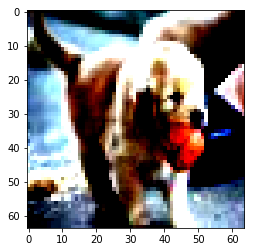

In [260]:
breed = dog_loader.get_examples_by_label("valid", label = 2, num_examples=None)
plt.imshow(breed[1])

In [271]:
#define network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(64*64*3, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x)
    
network = Net()
optimizer = torch.optim.SGD(network.parameters(), lr=.001)
loser = nn.CrossEntropyLoss()
converge_thresh = 1e-4
max_epochs = 50
batch_size = 10
train_times = []
accuracies = []

#torch.from_numpy(train_features)
train_features, train_targets = dog_loader.get_train_examples()
x = torch.from_numpy(train_features).float()
y = torch.from_numpy(train_targets).float()
train_loader = torch.utils.data.DataLoader(MyDataset(x,y), batch_size=batch_size, shuffle=True)

#for validation
valid_features, valid_targets = dog_loader.get_validation_examples()
x_ = torch.from_numpy(valid_features).float()
y_ = torch.from_numpy(valid_targets).float()
valid_loader = torch.utils.data.DataLoader(MyDataset(x_,y_), batch_size=batch_size, shuffle=True)


last_loss = 100
converge_count = 0
accuracies = []
valid_losses = []
train_losses = []
#train
timer=time.time()
for epoch in range(epochs):
    loss_sum = 0
    for batch_idx, (features, targets) in enumerate(train_loader):
        features, targets = torch.autograd.Variable(x), torch.autograd.Variable(y)
        # resize data
        features = features.view(-1, 64*64*3)
        optimizer.zero_grad()
        net_out = network(features)
        loss = loser(net_out, targets.long())
        loss_sum+=loss
        loss.backward()
        optimizer.step()
    train_losses.append(loss_sum/len(train_loader.dataset))
        

    # validation loop   
    loss = 0
    correct = 0
    for features, targets in valid_loader:
        feaures, targets = torch.autograd.Variable(features, volatile=True), torch.autograd.Variable(targets)
        features = features.view(-1, 64*64*3)
        net_out = network(features)
        # get loss
        loss += loser(net_out, targets.long()).data.item()
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correct += pred.eq(targets.data.long()).sum()
    avg_loss = loss / len(valid_loader.dataset)
    
    
    
    print("loss = ", avg_loss)
    #get number correct
    accuracy = 100. * correct.item() / len(valid_loader.dataset)
    accuracies.append(accuracy)
    valid_losses.append(avg_loss)
    if last_loss - avg_loss < converge_thresh:
        converge_count+=1
    else:
        converge_count = 0
    last_loss = avg_loss
    if converge_count>2:
        break


C:\Users\avido\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]
C:\Users\avido\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


loss =  0.22245456790924073
loss =  0.21740846413373946
loss =  0.2136072002053261
loss =  0.21087297183275222
loss =  0.2089367868900299
loss =  0.20766400700807572
loss =  0.20676773715019225
loss =  0.2062569780945778
loss =  0.2060368424654007
loss =  0.20606356179714203
loss =  0.20627374160289763
loss =  0.2067344015240669


In [250]:
np.arange(42)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41])

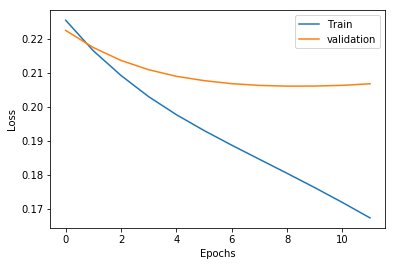

In [272]:
plt.plot(np.arange(12),train_losses)
plt.plot(np.arange(12),valid_losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","validation"])

Text(0,0.5,'Accuracies')

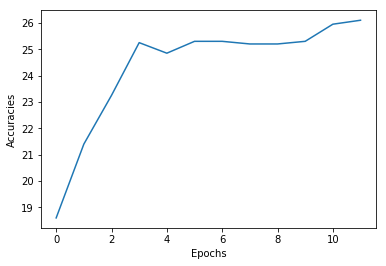

In [274]:
plt.plot(np.arange(12),accuracies)
plt.xlabel("Epochs")
plt.ylabel("Accuracies")

In [277]:
# run a test loop
test_features, test_targets = dog_loader.get_test_examples()
x = torch.from_numpy(test_features).float()
y = torch.from_numpy(test_targets).float()
test_loader = torch.utils.data.DataLoader(MyDataset(x,y), batch_size=batch_size, shuffle=True)

loss = 0
correct = 0
for features, targets in test_loader:
    feaures, targets = torch.autograd.Variable(features, volatile=True), torch.autograd.Variable(targets)
    features = features.view(-1, 64*64*3)
    net_out = network(features)
    # get loss
    loss += loser(net_out, targets.long()).data.item()
    #get number correct
    pred = net_out.data.max(1)[1]  # get the index of the max log-probability
    correct += pred.eq(targets.data.long()).sum()

avg_loss = loss / len(test_loader.dataset)
accuracy = 100. * correct.item() / len(test_loader.dataset)
print(avg_loss)
print(accuracy)

C:\Users\avido\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\avido\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


2.6958845076528757
9.90990990990991


Convolution layers

In [284]:
#define network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=5, stride=1, padding=2)) #, nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2)) #, nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(7 * 7 * 64, 10)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(out)
        x = out.reshape(out.size(0), -1)
        x = self.drop_out(out)
        #x = self.fc1(out)
        x = F.relu(self.fc1(x))
        return F.log_softmax(x)
    
network = Net()
optimizer = torch.optim.SGD(network.parameters(), lr=.001)
loser = nn.CrossEntropyLoss()
converge_thresh = 1e-4
max_epochs = 50
batch_size = 10
train_times = []
accuracies = []

#torch.from_numpy(train_features)
train_features, train_targets = dog_loader.get_train_examples()
x = torch.from_numpy(train_features).float()
y = torch.from_numpy(train_targets).float()
train_loader = torch.utils.data.DataLoader(MyDataset(x,y), batch_size=batch_size, shuffle=True)

#for validation
valid_features, valid_targets = dog_loader.get_validation_examples()
x_ = torch.from_numpy(valid_features).float()
y_ = torch.from_numpy(valid_targets).float()
valid_loader = torch.utils.data.DataLoader(MyDataset(x_,y_), batch_size=batch_size, shuffle=True)


last_loss = 100
converge_count = 0
accuracies = []
valid_losses = []
train_losses = []
#train
timer=time.time()
for epoch in range(epochs):
    loss_sum = 0
    for batch_idx, (features, targets) in enumerate(train_loader):
        features, targets = torch.autograd.Variable(x), torch.autograd.Variable(y)
        # resize data
        features = features.view(-1, 64*64*3)
        optimizer.zero_grad()
        net_out = network(features)
        loss = loser(net_out, targets.long())
        loss_sum+=loss
        loss.backward()
        optimizer.step()
    train_losses.append(loss_sum/len(train_loader.dataset))
        

    # validation loop   
    loss = 0
    correct = 0
    for features, targets in valid_loader:
        feaures, targets = torch.autograd.Variable(features, volatile=True), torch.autograd.Variable(targets)
        features = features.view(-1, 64*64*3)
        net_out = network(features)
        # get loss
        loss += loser(net_out, targets.long()).data.item()
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correct += pred.eq(targets.data.long()).sum()
    avg_loss = loss / len(valid_loader.dataset)
    
    
    
    print("loss = ", avg_loss)
    #get number correct
    accuracy = 100. * correct.item() / len(valid_loader.dataset)
    accuracies.append(accuracy)
    valid_losses.append(avg_loss)
    if last_loss - avg_loss < converge_thresh:
        converge_count+=1
    else:
        converge_count = 0
    last_loss = avg_loss
    if converge_count>2:
        break


RuntimeError: Expected 4-dimensional input for 4-dimensional weight 32 3, but got 2-dimensional input of size [7665, 12288] instead

helper functions

In [88]:
#dataloader

def load_data(dataset, fraction=1.0, base_folder='data'):
    """
    Loads a dataset and performs a random stratified split into training and
    test partitions.

    Arguments:
        dataset - (string) The name of the dataset to load. One of the
            following:
              'blobs': A linearly separable binary classification problem.
              'mnist-binary': A subset of the MNIST dataset containing only
                  0s and 1s.
              'mnist-multiclass': A subset of the MNIST dataset containing the
                  numbers 0 through 4, inclusive.
              'synthetic': A small custom dataset for exploring properties of
                  gradient descent algorithms.
        fraction - (float) Value between 0.0 and 1.0 representing the fraction
            of data to include in the training set. The remaining data is
            included in the test set. Unused if dataset == 'synthetic'.
        base_folder - (string) absolute path to your 'data' directory. If
            defaults to 'data'.
    Returns:
        train_features - (np.array) An Nxd array of features, where N is the
            number of examples and d is the number of features.
        test_features - (np.array) An Nxd array of features, where M is the
            number of examples and d is the number of features.
        train_targets - (np.array) A 1D array of targets of size N.
        test_targets - (np.array) A 1D array of targets of size M.
    """
    if dataset == 'blobs':
        path = os.path.join(base_folder, 'blobs.json')
        train_features, test_features, train_targets, test_targets = \
            load_json_data(path)
    elif dataset == 'mnist-binary':
        train_features, test_features, train_targets, test_targets = \
            load_mnist_data(2, fraction=fraction, mnist_folder=base_folder)
        train_targets = train_targets * 2 - 1
        test_targets = test_targets * 2 - 1
    elif dataset == 'mnist-multiclass':
        train_features, test_features, train_targets, test_targets = \
            load_mnist_data(5, fraction=fraction, examples_per_class=100,
                            mnist_folder=base_folder)
    elif dataset == 'synthetic':
        path = os.path.join(base_folder,  'synthetic.json')
        train_features, test_features, train_targets, test_targets = \
            load_json_data(path)
    else:
        raise ValueError('Dataset {} not found!'.format(dataset))

    # Normalize the data using feature-independent whitening. Note that the
    # statistics are computed with respect to the training set and applied to
    # both the training and testing sets.
    if dataset != 'synthetic':
        mean = train_features.mean(axis=0, keepdims=True)
        std = train_features.std(axis=0, keepdims=True) + 1e-5
        train_features = (train_features - mean) / std
        if fraction < 1.0:
            test_features = (test_features - mean) / std

    return train_features, test_features, train_targets, test_targets


def load_json_data(path, fraction=None, examples_per_class=None):
    """
    Loads a dataset stored as a JSON file. This will not split your dataset
    into training and testing sets, rather it returns all features and targets
    in `train_features` and `train_targets` and leaves `test_features` and
    `test_targets` as empty numpy arrays. This is done to match the API
    of the other data loaders.

    Args:
        path - (string) Path to json file containing the data
        fraction - (float) Ignored.
        examples_per_class - (int) - Ignored.

    Returns:
        train_features - (np.array) An Nxd array of features, where N is the
            number of examples and d is the number of features.
        test_features - (np.array) An empty 2D numpy array.
        train_targets - (np.array) A 1D array of targets of size N.
        test_targets - (np.array) An empty 1D array.
    """
    with open(path, 'rb') as file:
        data = json.load(file)
    features = np.array(data[0]).astype(float)
    targets = np.array(data[1]).astype(int)

    return features, np.array([[]]), targets, np.array([])


def load_mnist_data(threshold, fraction=1.0, examples_per_class=500, mnist_folder='data'):
    """
    Loads a subset of the MNIST dataset.

    Arguments:
        threshold - (int) One greater than the maximum digit in the selected
            subset. For example to get digits [0, 1, 2] this arg should be 3, or
            to get the digits [0, 1, 2, 3, 4, 5, 6] this arg should be 7.
        fraction - (float) Value between 0.0 and 1.0 representing the fraction
            of data to include in the training set. The remaining data is
            included in the test set. Unused if dataset == 'synthetic'.
        examples_per_class - (int) Number of examples to retrieve in each
            class.
        mnist_folder - (string) Path to folder contain MNIST binary files.

    Returns:
        train_features - (np.array) An Nxd array of features, where N is the
            number of examples and d is the number of features.
        test_features - (np.array) An Nxd array of features, where M is the
            number of examples and d is the number of features.
        train_targets - (np.array) A 1D array of targets of size N.
        test_targets - (np.array) A 1D array of targets of size M.
    """
    assert 0.0 <= fraction <= 1.0, 'Whoopsies! Incorrect value for fraction :P'

    train_examples = int(examples_per_class * fraction)
    if train_examples == 0:
        train_features, train_targets = np.array([[]]), np.array([])
    else:
        train_features, train_targets = _load_mnist(
            dataset='training', digits=range(threshold), path=mnist_folder)
        train_features, train_targets = stratified_subset(
            train_features, train_targets, train_examples)
        train_features = train_features.reshape((len(train_features), -1))

    test_examples = examples_per_class - train_examples
    if test_examples == 0:
        test_features, test_targets = np.array([[]]), np.array([])
    else:
        test_features, test_targets = _load_mnist(
            dataset='testing', digits=range(threshold), path=mnist_folder)
        test_features, test_targets = stratified_subset(
            test_features, test_targets, test_examples)
        test_features = test_features.reshape((len(test_features), -1))

    return train_features, test_features, train_targets, test_targets


def _load_mnist(path, dataset="training", digits=None, asbytes=False,
                selection=None, return_labels=True, return_indices=False):
    """
    Loads MNIST files into a 3D numpy array. Does not automatically download
    the dataset. You must download the dataset manually. The data can be
    downloaded from http://yann.lecun.com/exdb/mnist/.

    Examples:
        1) Assuming that you have downloaded the MNIST database in a directory
        called 'data', this will load all images and labels from the training
        set:

            images, labels = _load_mnist('training')

        2) And this will load 100 sevens from the test partition:

            sevens = _load_mnist('testing', digits=[7], selection=slice(0, 100),
                                return_labels=False)

    Arguments:
        path - (str) Path to your MNIST datafiles.
        dataset - (str) Either "training" or "testing". The data partition to
            load.
        digits - (list or None) A list of integers specifying the digits to
            load. If None, the entire database is loaded.
        asbytes - (bool) If True, returns data as ``numpy.uint8`` in [0, 255]
            as opposed to ``numpy.float64`` in [0.0, 1.0].
        selection - (slice) Using a `slice` object, specify what subset of the
            dataset to load. An example is ``slice(0, 20, 2)``, which would
            load every other digit until--but not including--the twentieth.
        return_labels - (bool) Specify whether or not labels should be
            returned. This is also a speed performance if digits are not
            specified, since then the labels file does not need to be read at
            all.
        return_indicies - (bool) Specify whether or not to return the MNIST
            indices that were fetched. This is valuable only if digits is
            specified, because in that case it can be valuable to know how far
            in the database it reached.
    Returns:
        images - (np.array) Image data of shape ``(N, rows, cols)``, where
            ``N`` is the number of images. If neither labels nor indices are
            returned, then this is returned directly, and not inside a 1-sized
            tuple.
        labels - (np.array) Array of size ``N`` describing the labels.
            Returned only if ``return_labels`` is `True`, which is default.
        indices - (np.array) The indices in the database that were returned.
    """

    # The files are assumed to have these names and should be found in 'path'
    files = {
        'training': ('train-images-idx3-ubyte', 'train-labels-idx1-ubyte'),
        'testing': ('t10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte'),
    }

    try:
        images_fname = os.path.join(path, files[dataset][0])
        labels_fname = os.path.join(path, files[dataset][1])
    except KeyError:
        raise ValueError("Data set must be 'testing' or 'training'")

    # We can skip the labels file only if digits aren't specified and labels
    # aren't asked for
    if return_labels or digits is not None:
        flbl = open(labels_fname, 'rb')
        magic_nr, size = struct.unpack(">II", flbl.read(8))
        labels_raw = pyarray("b", flbl.read())
        flbl.close()

    fimg = open(images_fname, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", fimg.read(16))
    images_raw = pyarray("B", fimg.read())
    fimg.close()

    if digits:
        indices = [k for k in range(size) if labels_raw[k] in digits]
    else:
        indices = range(size)

    if selection:
        indices = indices[selection]

    images = np.zeros((len(indices), rows, cols), dtype=np.uint8)

    if return_labels:
        labels = np.zeros((len(indices)), dtype=np.int8)
    for i in range(len(indices)):
        images[i] = np.array(images_raw[indices[i] * rows * cols:(indices[i] + 1) * rows * cols]).reshape((rows, cols))
        if return_labels:
            labels[i] = labels_raw[indices[i]]

    if not asbytes:
        images = images.astype(float)/255.0

    ret = (images,)
    if return_labels:
        ret += (labels,)
    if return_indices:
        ret += (indices,)

    if len(ret) == 1:
        return ret[0]  # Don't return a tuple of one

    return ret


def stratified_subset(features, targets, examples_per_class):
    """
    Evenly sample the dataset across unique classes. Requires each unique class
    to have at least examples_per_class examples.

    Arguments:
        features - (np.array) An Nxd array of features, where N is the
            number of examples and d is the number of features.
        targets - (np.array) A 1D array of targets of size N.
        examples_per_class - (int) The number of examples to take in each
            unique class.
    Returns:
        train_features - (np.array) An Nxd array of features, where N is the
            number of examples and d is the number of features.
        test_features - (np.array) An Nxd array of features, where M is the
            number of examples and d is the number of features.
        train_targets - (np.array) A 1D array of targets of size N.
        test_targets - (np.array) A 1D array of targets of size M.
    """
    idxs = np.array([False] * len(features))
    for target in np.unique(targets):
        idxs[np.where(targets == target)[0][:examples_per_class]] = True
    return features[idxs], targets[idxs]


In [194]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import imread
import os


class DogsDataset:

    def __init__(self, path_to_dogsset, num_classes=10):
        """
        This is a class that loads DogSet into memory. Give it the path
        to the DogSet folder on your machine and it will load it when you
        initialize this object.

        Training examples are stored in `self.trainX` and `self.trainY`
        for the images and labels, respectively. Validation examples
        are similarly in `self.validX` and `self.validY`, and test
        examples are in `self.testX` and self.testY`.

        You can also access the training, validation, and testing sets
        with the `get_training_examples()`, `get_validation_exmples()`
        and `get_test_examples()` functions.

        The `trainX`, `validX`, and `testX` arrays are of shape:
            `[num_examples, height, width, n_channels]`

        (For DogSet `height` == `width`.)

        The `trainY`, `validY`, and `testY` arrays are of shape:
            `[num_examples]`

        """
        self.path_to_dogs_csv = os.path.join(path_to_dogsset, 'dogs.csv')
        self.images_dir = os.path.join(path_to_dogsset, 'images')
        np.random.seed(0)
        self.num_classes = num_classes
        # Load in all the data we need from disk
        self.metadata = pd.read_csv(self.path_to_dogs_csv)
        self.semantic_labels = dict(zip(
            self.metadata['numeric_label'],
            self.metadata['semantic_label']
        ))

        self.trainX, self.trainY = self._load_data('train')
        self.validX, self.validY = self._load_data('valid')
        self.testX, self.testY = self._load_data('test')
        self.all_index = np.arange(len(self.trainX) + len(self.testX))
        self.all_count = 0
        self.valid_count = 0

    def get_train_examples(self):
        """
        Gets all training examples in DogSet.
        :return:
            (np.ndarray, np.ndarray), all training examples and all training labels
        """
        return self.trainX, self.trainY

    def get_validation_examples(self):
        """
        Gets all validation examples in DogSet.
        :return:
            (np.ndarray, np.ndarray), all validation examples and all validation labels
        """
        return self.validX, self.validY

    def get_test_examples(self):
        """
        Gets all test examples in DogSet.
        :return:
            (np.ndarray, np.ndarray), all test examples and all test labels
        """
        return self.testX, self.trainY

    def get_examples_by_label(self, partition, label, num_examples=None):
        """
        Returns the entire subset of the partition that belongs to the class
        specified by label. If num_examples is None, returns all relevant
        examples.
        """
        if partition == 'train':
            X = self.trainX[self.trainY == label]
        elif partition == 'valid':
            X = self.validX[self.validY == label]
        elif partition == 'test':
            X = self.testX[self.testX == label]
        else:
            raise ValueError('Partition {} does not exist'.format(partition))
        return X if num_examples == None else X[:num_examples]

    def get_semantic_label(self, numeric_label):
        """
        Returns the string representation of the numeric class label (e.g.,
        the numberic label 1 maps to the semantic label 'miniature_poodle').
        """
        return self.semantic_labels[numeric_label]

    def _load_data(self, partition='train'):
        """
        Loads a single data partition from file.
        """
        print("loading %s..." % partition)
        Y = None
        if partition == 'all':
            X = self._get_images(
                self.metadata[~self.metadata.partition.isin(['train', 'valid', 'test'])])
            X = self._preprocess(X, False)
            return X
        else:
            X, Y = self._get_images_and_labels(
                self.metadata[self.metadata.partition == partition],
                training = partition in ['train', 'valid'])
            X = self._preprocess(X, True)
            return X, Y

    def _get_images_and_labels(self, df, training=True):
        """
        Fetches the data based on image filenames specified in df.
        If training is true, also loads the labels.
        """
        X, y = [], []
        if training:
            for i, row in df.iterrows():
                label = row['numeric_label']
                if label >= self.num_classes: continue
                image = imread(os.path.join(self.images_dir, row['filename']))
                X.append(image)
                y.append(row['numeric_label'])
            return np.array(X), np.array(y).astype(int)
        else:
            for i, row in df.iterrows():
                image = imread(os.path.join(self.images_dir, row['filename']))
                X.append(image)
            return np.array(X), None

    def _get_images(self, df):
        X = []
        for i, row in df.iterrows():
            image = imread(os.path.join(self.images_dir, row['filename']))
            X.append(image)
        return np.array(X)

    def _preprocess(self, X, is_train):
        """
        Preprocesses the data partition X by normalizing the images
        """
        X = self._normalize(X, is_train)
        return X

    def _normalize(self, X, is_train):
        """
        Normalizes the partition to have mean 0 and variance 1. Learns the
        mean and standard deviation parameters from the training set and
        applies these values when normalizing the other data partitions.

        Returns:
            the normalized data as a numpy array.
        """
        if is_train:
            self.image_mean = np.mean(X, axis=(0,1,2))
            self.image_std = np.std(X, axis=(0,1,2))
        return (X - self.image_mean) / self.image_std

